Título: Voronoi Binning

Data: 23/03/2020
    
Obj: Aplicar o algoritmo de Voronoi para aumentar a razão sinal/ruído em spaxes que possam ser aglotinados. Baseado no código de Michele Cappellari: The Voronoi binning method (VorBin) disponível em: https://www-astro.physics.ox.ac.uk/~mxc/software/#binning e descrito em https://ui.adsabs.harvard.edu/abs/2003MNRAS.342..345C

Autor: Carlos Roberto

In [4]:
from os import path
import numpy as np
import matplotlib.pyplot as plt

import vorbin
from vorbin.voronoi_2d_binning import voronoi_2d_binning

data_folder = "/home/carlos/Desktop/pPXF(SDP)/Final/"

Bin-accretion...
1  /  18
2  /  18
3  /  18
4  /  18
5  /  18
6  /  18
7  /  18
8  /  18
9  /  18
10  /  18
11  /  18
12  /  18
13  /  18
14  /  18
15  /  18
16  /  18
17  /  18
18  /  18
19  /  18
20  /  18
21  /  18
21  initial bins.
Reassign bad bins...
17  good bins.
Unbinned pixels:  0  /  283
Fractional S/N scatter (%): 21.64357151570775
Elapsed time accretion: 0.05 seconds
Elapsed time optimization: 0.00 seconds


"\nplt.subplot(211)\nplt.xlabel('R(px)')\nplt.ylabel('R(px)')\nplt.subplot(212)\nplt.xlabel('R(px)')\n"

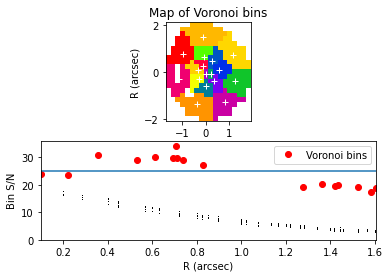

In [5]:
#y: é a posição y de onde foi extraído o sinal e o ruído
#x: é a posição x de onde foi extraído o sinal e o ruído
#signal: é o sinal do spaxel (y,x)
#noise: é o ruído do spaxel (y,x)

y, x, signal, noise = np.loadtxt("GoodPixels.txt").T #Lê a saída do código SNR
targetSN = 25 #Threshold pretendido

    # Perform the actual computation. The vectors
    # (binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale)
    # are all generated in *output*
    #
binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale = voronoi_2d_binning((x-29)*0.2, (y-29)*0.2, signal, 
                                                                          noise, targetSN, plot=1, quiet=0,
                                                                         wvt=False,cvt=False)

    # Save to a text file the initial coordinates of each pixel together
    # with the corresponding bin number computed by this procedure.
    # binNum uniquely specifies the bins and for this reason it is the only
    # number required for any subsequent calculation on the bins.
    #
np.savetxt('Voronoi_OutPut.txt', np.column_stack([y, x, binNum]),header="y_px \t x_px \t Vorbin_Id", fmt=b'%10.6f %10.6f %8i')
"""
plt.subplot(211)
plt.xlabel('R(px)')
plt.ylabel('R(px)')
plt.subplot(212)
plt.xlabel('R(px)')
"""
#plt.savefig(data_folder+'Data/Voronoi20/Vorbin.png', format='png')

#Essas são as novas posições dos spaxels binnados

#print(xBar)
#print(yBar)

In [6]:
(xNode)

array([ 0.        , -0.3       , -0.33333333, -0.13333333, -1.12413793,
       -0.99310345, -0.08      , -0.10212766,  0.28      ,  0.2       ,
        0.56      ,  1.14736842,  0.35      ,  0.        ,  1.22068966,
       -0.37073171,  0.81875   ])

In [7]:
(yNode)

array([-0.1       , -0.3       ,  0.06666667,  0.26666667, -0.28965517,
        0.75862069,  0.64      ,  1.48085106,  0.44      , -0.1       ,
        0.08      ,  0.69473684, -0.4       , -0.6       , -0.4       ,
       -1.35121951, -1.2875    ])